In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv(r"F:\telcocustomerchurn\telco customer churn.csv")
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [8]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7867803837953091
Decision Tree Accuracy: 0.7299218194740583
Random Forest Accuracy: 0.7860696517412935

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [9]:
feature_importance = pd.DataFrame({
    'Feature': df.drop('Churn', axis=1).columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTop 10 Features:\n", feature_importance.head(10))



Top 10 Features:
             Feature  Importance
19     TotalCharges    0.152603
18   MonthlyCharges    0.149936
5            tenure    0.136431
0        customerID    0.126720
15         Contract    0.085540
9    OnlineSecurity    0.044376
17    PaymentMethod    0.043136
12      TechSupport    0.036093
8   InternetService    0.023598
10     OnlineBackup    0.023139


In [10]:
df['Churn_Predicted'] = rf_model.predict(X_scaled)
df.to_csv("F:/telcocustomerchurn/Churn_Predicted.csv", index=False)
print("Dataset with predictions saved successfully!")


Dataset with predictions saved successfully!


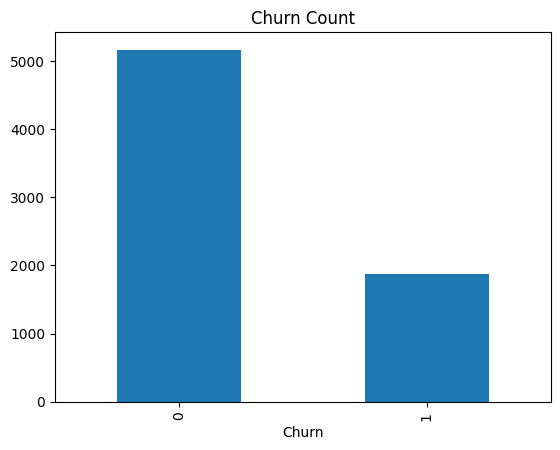

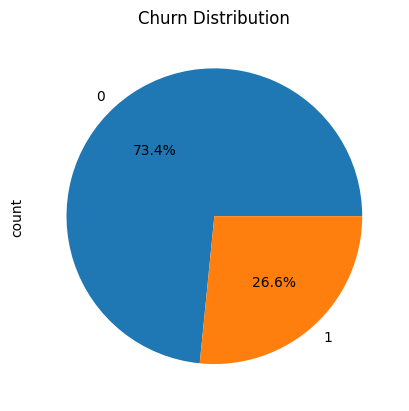

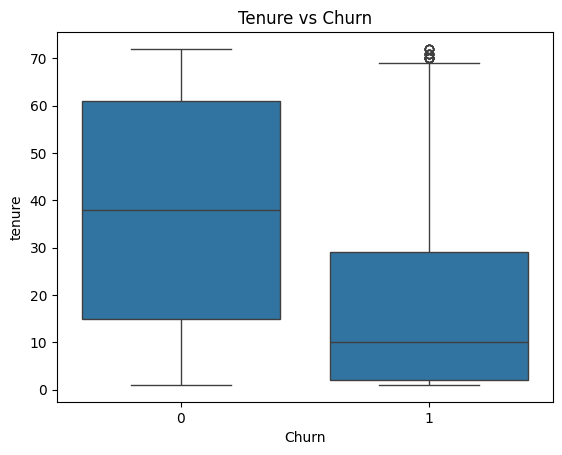

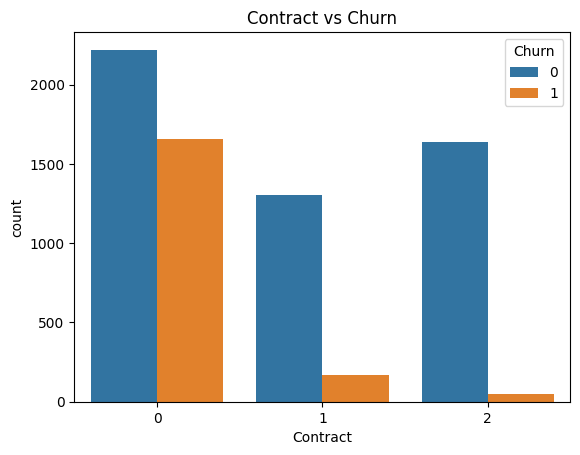

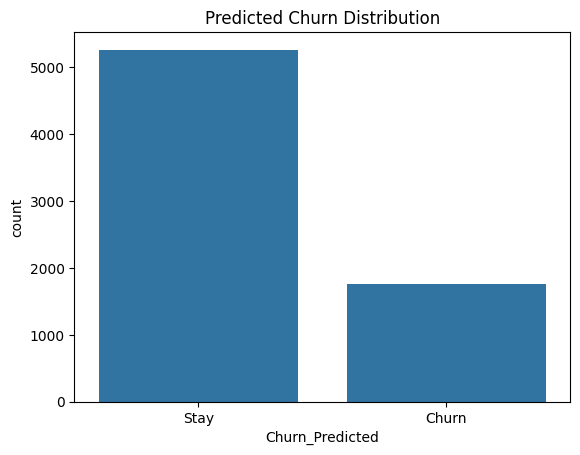

In [13]:
# Churn bar plot
plt.figure()
df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Count")
plt.savefig("F:/telcocustomerchurn/churn_count.png")
plt.show()

# Churn pie plot
plt.figure()
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Churn Distribution")
plt.savefig("F:/telcocustomerchurn/churn_distribution.png")
plt.show()

# Tenure vs Churn boxplot
plt.figure()
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.savefig("F:/telcocustomerchurn/tenure_vs_churn.png")
plt.show()

# Contract vs Churn countplot
plt.figure()
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract vs Churn")
plt.savefig("F:/telcocustomerchurn/contract_vs_churn.png")
plt.show()

# Predicted Churn distribution
plt.figure()
sns.countplot(x='Churn_Predicted', data=df)
plt.title("Predicted Churn Distribution")
plt.xticks([0,1], ['Stay', 'Churn'])
plt.savefig("F:/telcocustomerchurn/predicted_churn.png")
plt.show()


In [14]:
print("Number of customers predicted to churn:", df['Churn_Predicted'].sum())
print("Number of customers predicted to stay:", len(df) - df['Churn_Predicted'].sum())
print("\nTop 5 features affecting churn:\n", feature_importance.head(5))


Number of customers predicted to churn: 1764
Number of customers predicted to stay: 5268

Top 5 features affecting churn:
            Feature  Importance
19    TotalCharges    0.152603
18  MonthlyCharges    0.149936
5           tenure    0.136431
0       customerID    0.126720
15        Contract    0.085540
